In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
# import missingno as msno

In [271]:
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# U1401 Dataset

In [272]:
year_name ='U1401'
excel_file_path = f'{year_name}.xlsx'
excel_sheets_dict_2 = pd.read_excel(excel_file_path, sheet_name=None)

In [273]:
# type(excel_sheets_dict)   

In [274]:
import copy
excel_sheets_dict = copy.deepcopy(excel_sheets_dict_2)

In [275]:
# excel_sheets_dict = excel_sheets_dict_2.copy()

In [276]:
dfs = list(excel_sheets_dict.keys())
dfs

['U1401Data',
 'U1401P1',
 'U1401P2',
 'U1401P3S01',
 'U1401P3S02',
 'U1401P3S03',
 'U1401P3S04',
 'U1401P3S05',
 'U1401P3S06',
 'U1401P3S07',
 'U1401P3S08',
 'U1401P3S09',
 'U1401P3S10',
 'U1401P3S11',
 'U1401P3S12',
 'U1401P3S13',
 'U1401P3S14',
 'U1401P4S01',
 'U1401P4S02',
 'U1401P4S03',
 'U1401P4S04']

In [277]:
# for sheet in dfs:
#     display(f'Sheet_name : {sheet}', excel_sheets_dict[sheet].head())

In [278]:

# for sheet in dfs:
#     display(f'Missing Value of  : {sheet}', pd.DataFrame({'Sum_of_MN':excel_sheets_dict[sheet].isna().sum(),'Mean_of_MN' : (excel_sheets_dict[sheet].isna().mean()* 100)}))

## Dataframes with Missing Values

In [279]:
cols_with_Missing = []
for sheet in dfs:
    if excel_sheets_dict[sheet].isna().sum().any():
        cols_with_Missing.append(sheet)

cols_with_Missing

['U1401P1',
 'U1401P2',
 'U1401P3S01',
 'U1401P3S02',
 'U1401P4S01',
 'U1401P4S02',
 'U1401P4S03',
 'U1401P4S04']

## R1401Data 
### Features :

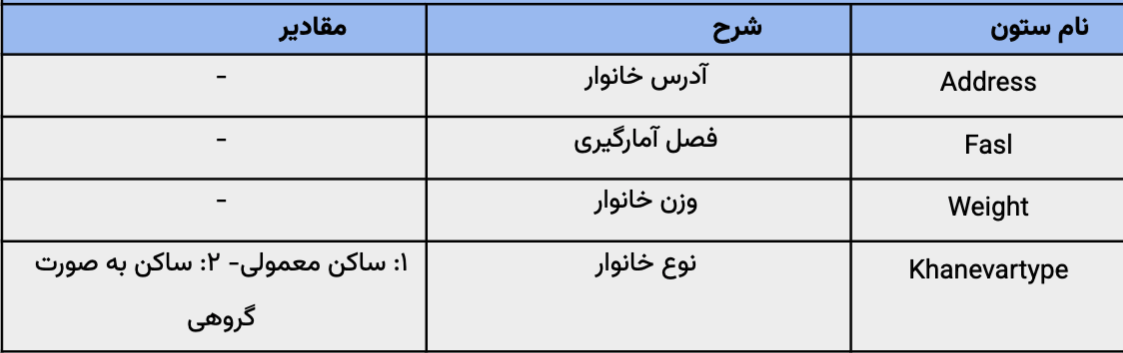
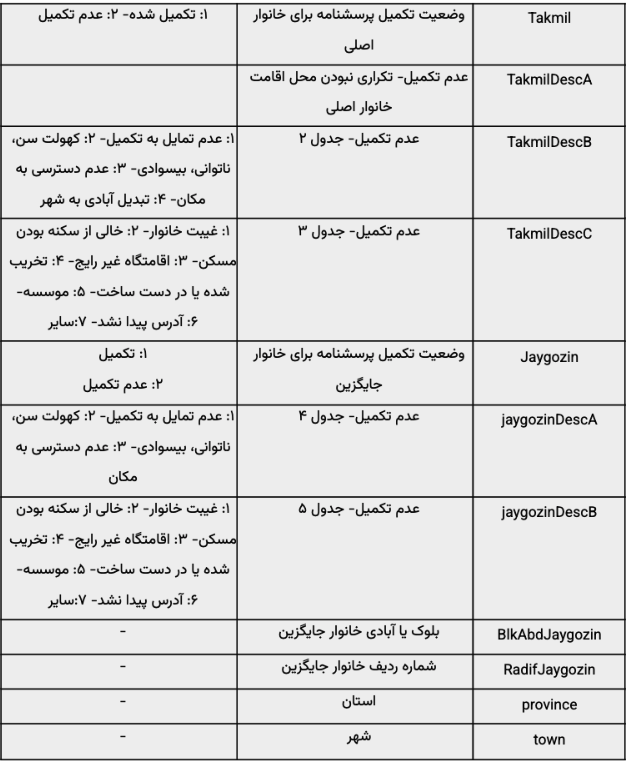


In [280]:
R1401Data = excel_sheets_dict[f'{year_name}Data']
R1401Data.head()

,Address,province,town
0,10416057935,AzarbaijanGharbi,16
1,10417058327,AzarbaijanGharbi,17
2,10417058329,AzarbaijanGharbi,17
3,10417058334,AzarbaijanGharbi,17
4,10417058335,AzarbaijanGharbi,17


In [281]:
pd.DataFrame({'Sum_of_MN':R1401Data.isna().sum(),'Mean_of_MN' : (R1401Data.isna().mean()* 100)})

,Sum_of_MN,Mean_of_MN
Address,0,0.0
province,0,0.0
town,0,0.0


- Delete approach for columns : `BlkAbdJaygozin` ,`RadifJaygozin`
    * High missing value around 80 %

In [282]:
R1401Data.isna().sum().any()

False

In [283]:
R1401Data.isna().sum()

Address     0
province    0
town        0
dtype: int64

In [284]:
R1401Data.head(20)

,Address,province,town
0,10416057935,AzarbaijanGharbi,16
1,10417058327,AzarbaijanGharbi,17
2,10417058329,AzarbaijanGharbi,17
3,10417058334,AzarbaijanGharbi,17
4,10417058335,AzarbaijanGharbi,17
5,10417058341,AzarbaijanGharbi,17
6,10501058726,Kermanshah,1
7,10501058730,Kermanshah,1
8,10501058732,Kermanshah,1
9,10501058735,Kermanshah,1


In [285]:
R1401Data[R1401Data.duplicated()]

,Address,province,town


In [286]:
R1401Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19567 entries, 0 to 19566
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Address   19567 non-null  int64 
 1   province  19567 non-null  object
 2   town      19567 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 458.7+ KB


In [287]:
new_df=R1401Data

**province encode**

In [288]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['province'] = le.fit_transform(new_df['province'].astype(str))
new_df.province.unique().shape[0]

31

In [289]:
new_df['decoded_province']=le.inverse_transform(new_df['province'])
new_df[['decoded_province','province']].to_csv(f'{year_name}province.csv', index=False)

In [290]:
# new_df.province=new_df.province.astype('category').cat.codes
# new_df.province.unique().shape[0]

**town encode**

In [41]:
new_df.town.dtypes

dtype('int64')

In [42]:
new_df.Address.unique()

array([20001383908, 20001383911, 20001383915, ..., 23006709723,
       23006709807, 23006709818], dtype=int64)

In [43]:
new_df=new_df.groupby('Address').agg({'province':pd.Series.mode,'town':pd.Series.mode}).reset_index()
new_df

,Address,province,town
0,20001383908,22,1
1,20001383911,22,1
2,20001383915,22,1
3,20001383916,22,1
4,20001383920,22,1
...,...,...,...
18425,23006709717,0,6
18426,23006709720,0,6
18427,23006709723,0,6
18428,23006709807,0,6


In [44]:
# new_df.to_csv(f'{year_name}Data.csv', index=False)

# R1401P1

## Features :
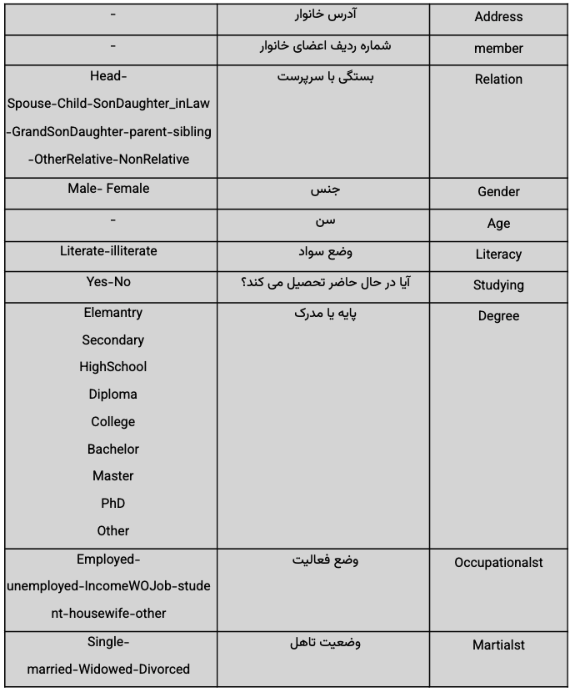

In [45]:
R1401P1 = excel_sheets_dict[f'{year_name}P1']
R1401P1.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
0,20010394208,1,Head,Male,50,literate,No,Elemantry,employed,Married
1,20010394208,2,Spouse,Female,45,illiterate,NaN,NaN,Housewife,Married
2,20010394208,3,Child,Female,26,literate,No,Elemantry,Housewife,Married
3,20010394208,4,Child,Male,25,literate,No,Bachelor,employed,Single
4,20010394208,5,Child,Male,14,literate,Yes,Secondary,Student,Single


In [46]:
pd.DataFrame({'Sum_of_MN':R1401P1.isna().sum(),'Mean_of_MN' : (R1401P1.isna().mean()* 100)})


,Sum_of_MN,Mean_of_MN
Address,0,0.000000
member,0,0.000000
relation,0,0.000000
gender,0,0.000000
age,0,0.000000
literacy,6239,9.703559
studying,19119,29.735909
degree,19119,29.735909
occupationalst,10688,16.623118
maritalst,10687,16.621563


In [47]:
R1401P1.literacy.unique()

# illiterate : بی سواد

# literate : با سواد

array(['literate', 'illiterate', nan], dtype=object)

In [48]:
literacy = R1401P1.loc[R1401P1.literacy.isna(), ['literacy','relation','gender','age']]
literacy.head()

,literacy,relation,gender,age
32,NaN,Child,Male,4
39,NaN,Child,Female,3
47,NaN,Child,Female,3
62,NaN,Child,Male,0
71,NaN,Child,Female,2


In [49]:
literacy = R1401P1[R1401P1.literacy.isna()]
literacy.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
32,20001385412,4,Child,Male,4,NaN,NaN,NaN,NaN,NaN
39,20011395407,4,Child,Female,3,NaN,NaN,NaN,NaN,NaN
47,20010394223,5,Child,Female,3,NaN,NaN,NaN,NaN,NaN
62,20006390209,5,Child,Male,0,NaN,NaN,NaN,NaN,NaN
71,20011395423,4,Child,Female,2,NaN,NaN,NaN,NaN,NaN


In [50]:
literacy = R1401P1.loc[R1401P1.literacy.isna(), ['literacy','relation','gender','age']]
for x in literacy.columns:
    display(literacy[x].unique())

array([nan], dtype=object)

array(['Child', 'GrandSonDaughter', 'OtherRelative', 'NonRelative'],
      dtype=object)

array(['Male', 'Female'], dtype=object)

array([4, 3, 0, 2, 5, 1, 6], dtype=int64)

In [51]:
# R1401P1.loc[R1401P1.relation == 'Child', 'literacy'].isna().sum()

In [52]:
# R1401P1.loc[R1401P1.relation == 'GrandSonDaughter', 'literacy'].isna().sum()


In [53]:
# R1401P1.loc[R1401P1.relation == 'OtherRelative', 'literacy'].isna().sum()


In [54]:
# R1401P1.loc[R1401P1.relation == 'NonRelative', 'literacy'].isna().sum()

In [55]:
# 4223 + 257 + 4+ 1

In [56]:
# R1401P1['literacy'].isna().sum()

In [57]:
R1401P1['relation'].value_counts(dropna=False)

relation
Child                28101
Head                 18430
Spouse               15046
GrandSonDaughter       877
Parent                 677
SonDaughter_inLaw      598
Sibling                333
OtherRelative          216
NonRelative             18
Name: count, dtype: int64

In [58]:
R1401P1['literacy'].value_counts(dropna=False)


literacy
literate      45177
illiterate    12880
NaN            6239
Name: count, dtype: int64

#### Approch : کودک از ۷ سالگی به مدرسه میرود
- for retlation = 'Child' and age under 7 --- > literacy = 'illiterate'  

- for retlation = 'Child' and age above 7 --- > literacy = 'literate'

In [59]:
R1401P1.loc[R1401P1.relation == 'Child', 'literacy'].isna().sum()

5772

In [60]:
R1401P1[(R1401P1.relation == 'Child') & (R1401P1.age < 7)].isna().sum()

Address              0
member               0
relation             0
gender               0
age                  0
literacy          5772
studying          6043
degree            6043
occupationalst    6824
maritalst         6824
dtype: int64

In [61]:
# illiterate 
# R1401P1.loc[(R1401P1.relation == 'Child') & (R1401P1.age < 7) & (R1401P1.literacy.isna()), 'literacy'] = 'illiterate'



we dont want any condition on age for literacy because they are all kids

*mahdi edits*

In [62]:
R1401P1[(R1401P1.literacy.isna())].age.value_counts()

age
5    1193
4    1138
3    1122
2    1087
1     920
0     752
6      27
Name: count, dtype: int64



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
همه اونهایی که سواد ندارن کودک هستند پس به راحتی با illitrate پرشون می کنیم
</p>

In [63]:
R1401P1.loc[(R1401P1.literacy.isna()),'literacy']='illiterate'

*mahdi edits*

In [64]:
R1401P1.isna().sum() # No missing value

Address               0
member                0
relation              0
gender                0
age                   0
literacy              0
studying          19119
degree            19119
occupationalst    10688
maritalst         10687
dtype: int64

اینجا کارمون با literacy تمام میشود!

`literacy` column done

In [65]:
pd.DataFrame({'Sum_of_MN':R1401P1.isna().sum(),'Mean_of_MN' : (R1401P1.isna().mean()* 100)})

,Sum_of_MN,Mean_of_MN
Address,0,0.000000
member,0,0.000000
relation,0,0.000000
gender,0,0.000000
age,0,0.000000
literacy,0,0.000000
studying,19119,29.735909
degree,19119,29.735909
occupationalst,10688,16.623118
maritalst,10687,16.621563


`studying` column

In [66]:
R1401P1.studying.unique()

array(['No', nan, 'Yes'], dtype=object)

In [67]:
R1401P1.studying.value_counts(dropna=False)


studying
No     32088
NaN    19119
Yes    13089
Name: count, dtype: int64

In [68]:
R1401P1[R1401P1.studying.isna()].head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
1,20010394208,2,Spouse,Female,45,illiterate,NaN,NaN,Housewife,Married
6,20004387813,1,Head,Male,55,illiterate,NaN,NaN,employed,Married
7,20004387813,2,Spouse,Female,52,illiterate,NaN,NaN,Housewife,Married
8,20003386610,1,Head,Male,80,illiterate,NaN,NaN,employed,Married
9,20003386610,2,Spouse,Female,74,illiterate,NaN,NaN,Housewife,Married


*mahdi edits*

In [69]:
R1401P1.loc[R1401P1.degree.isna()&(R1401P1.studying.isna()),['studying','degree']].isna().sum()


studying    19119
degree      19119
dtype: int64

میشه نتیجه گرفت دو ستون میزان تحصیلات و درس خواندن را با سواد نداشتن کامل پر کرد چه بچه باشه و چه نباشه

In [70]:
R1401P1.loc[R1401P1.studying.isna() & (R1401P1.degree.isna()) & (R1401P1.literacy=='illiterate'),'studying']='No'

In [71]:
R1401P1.loc[R1401P1.studying.isna() & (R1401P1.literacy=='illiterate'),'studying']='No'

In [72]:
R1401P1.studying.value_counts(dropna=False)

studying
No     51207
Yes    13089
Name: count, dtype: int64

In [73]:
R1401P1.loc[R1401P1.studying.isna()]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst


مقدار nan به درستی پر شد

In [74]:
R1401P1.loc[R1401P1.studying.isna()]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst




<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=5>
<b >this shows that studying and degree are the same. so for imputation studying column we can use literacy</b>
</p>

In [75]:
R1401P1.isna().sum()

Address               0
member                0
relation              0
gender                0
age                   0
literacy              0
studying              0
degree            19119
occupationalst    10688
maritalst         10687
dtype: int64

In [76]:
R1401P1.loc[(R1401P1.studying=='No') & (R1401P1.degree.isna()) & (R1401P1.literacy=='illiterate'),'degree']='NoneEducation'
R1401P1.isna().sum()

Address               0
member                0
relation              0
gender                0
age                   0
literacy              0
studying              0
degree                0
occupationalst    10688
maritalst         10687
dtype: int64

*end of mahdi edits*

### `degree`  column Done!

### `occupationalst` 9083

In [77]:
R1401P1['occupationalst'].unique()

array(['employed', 'Housewife', 'Student', nan, 'IncomeWOJob',
       'unemployed', 'Other'], dtype=object)

In [78]:
R1401P1[R1401P1['occupationalst']== 'unemployed'].head(10)

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
22,20004387820,1,Head,Male,38,literate,No,Diploma,unemployed,Divorced
48,20010394220,1,Head,Male,77,literate,No,Secondary,unemployed,Married
141,20012395811,1,Head,Male,33,literate,No,Diploma,unemployed,Married
157,20007391808,3,Child,Male,20,literate,No,Diploma,unemployed,Single
187,20007391811,4,Child,Female,22,literate,No,Elemantry,unemployed,Single
188,20012395817,1,Head,Male,40,literate,No,Elemantry,unemployed,Married
197,20013397020,1,Head,Male,38,literate,No,Elemantry,unemployed,Married
210,20004388220,4,Child,Male,25,literate,No,College,unemployed,Single
227,20011394623,3,Child,Male,20,literate,No,Diploma,unemployed,Single
229,20011394620,2,Child,Female,32,literate,No,Secondary,unemployed,Single


In [79]:
R1401P1[R1401P1['occupationalst']== 'Other'].head(10)


,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
168,20003387007,2,Spouse,Female,81,illiterate,No,NoneEducation,Other,Married
348,20012396208,1,Head,Male,73,illiterate,No,NoneEducation,Other,Married
356,20011394614,3,Child,Male,32,literate,No,Secondary,Other,Married
492,20002386216,2,Spouse,Female,84,illiterate,No,NoneEducation,Other,Married
496,20001385007,4,Child,Male,37,literate,No,Elemantry,Other,Single
497,20001385007,5,Child,Male,27,illiterate,No,NoneEducation,Other,Single
521,20007392217,3,Child,Male,18,literate,No,College,Other,Single
613,20007392623,3,Child,Female,20,literate,No,Diploma,Other,Single
669,20106401017,3,Child,Male,46,illiterate,No,NoneEducation,Other,Single
717,20107401517,2,Child,Female,41,illiterate,No,NoneEducation,Other,Single


In [80]:
R1401P1[R1401P1['occupationalst'].isna()]['age'].shape

(10688,)

In [81]:
R1401P1.groupby('occupationalst').agg({'age':'mean'})

,age
occupationalst,
Housewife,41.901850
IncomeWOJob,64.971471
Other,42.504926
Student,14.105441
employed,41.977864
unemployed,27.694455


میانگین سن مشاغل مختلف

In [82]:
R1401P1.loc[R1401P1.occupationalst.isna()]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
5,20010394208,6,Child,Female,8,literate,Yes,Elemantry,NaN,NaN
17,20004387809,5,Child,Male,7,literate,Yes,Elemantry,NaN,NaN
20,20004387817,3,Child,Female,9,literate,Yes,Elemantry,NaN,NaN
21,20004387817,4,Child,Male,9,literate,Yes,Elemantry,NaN,NaN
32,20001385412,4,Child,Male,4,illiterate,No,NoneEducation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
64260,23002703823,7,Child,Male,1,illiterate,No,NoneEducation,NaN,NaN
64271,23003706223,3,Child,Female,5,illiterate,No,NoneEducation,NaN,NaN
64272,23003706223,4,Child,Male,1,illiterate,No,NoneEducation,NaN,NaN
64286,23001701007,3,Child,Male,8,literate,Yes,Elemantry,NaN,NaN


In [83]:
R1401P1[R1401P1['occupationalst'].isna() & (R1401P1.age <= 9)]['gender'].value_counts()


gender
Male      5534
Female    5154
Name: count, dtype: int64

In [84]:
R1401P1

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
0,20010394208,1,Head,Male,50,literate,No,Elemantry,employed,Married
1,20010394208,2,Spouse,Female,45,illiterate,No,NoneEducation,Housewife,Married
2,20010394208,3,Child,Female,26,literate,No,Elemantry,Housewife,Married
3,20010394208,4,Child,Male,25,literate,No,Bachelor,employed,Single
4,20010394208,5,Child,Male,14,literate,Yes,Secondary,Student,Single
...,...,...,...,...,...,...,...,...,...,...
64291,23001701017,3,Child,Male,21,literate,No,College,employed,Single
64292,23001701020,1,Head,Male,57,literate,No,Secondary,employed,Married
64293,23001701020,2,Spouse,Female,50,literate,No,Secondary,Housewife,Married
64294,23001701020,3,Child,Male,26,literate,Yes,Bachelor,Student,Single


mahdi edit

In [85]:
R1401P1.loc[(R1401P1.occupationalst.isna()),'age'].value_counts()

age
5    1193
8    1179
4    1138
7    1135
6    1123
3    1122
2    1087
9    1039
1     920
0     752
Name: count, dtype: int64

جالب اینجاست همه اونهایی که حرفه اشون مشخص نیست کودک هستن حالا ازبین اینها بعضی هاشون باید دانش آموز باشند اما نیستن فقط اونهایی که در حال تحصیل هستن رو قرار میدیم دانش آموز

In [86]:
R1401P1.loc[(R1401P1.studying=='Yes') & (R1401P1.occupationalst.isna()),'occupationalst']='Student'

In [87]:
R1401P1.loc[(R1401P1.occupationalst.isna()),'age'].value_counts()

age
5    1193
4    1138
3    1122
2    1087
1     920
0     752
6     311
7      19
8      11
9       8
Name: count, dtype: int64

In [88]:
R1401P1.loc[(R1401P1.age.between(7,9)) & (R1401P1.studying=='Yes'), 'occupationalst'].shape

(3315,)

تعداد افراد کودکی هستند که درس میخوانند

In [89]:
R1401P1.loc[(R1401P1.age.between(0,9)) & (R1401P1.studying=='Yes'), 'occupationalst'].value_counts()


occupationalst
Student    4127
Name: count, dtype: int64

همه کودکان دانش آموز جدا شدند

In [90]:
R1401P1.loc[(R1401P1.age.between(0,9)) & (R1401P1.studying=='No'),'age'].value_counts()


age
5    1193
4    1138
3    1122
2    1087
1     920
0     752
6     311
7      19
8      11
9       8
Name: count, dtype: int64

In [91]:
R1401P1.loc[(R1401P1.age.between(7,9)) & (R1401P1.studying=='No'),].Address.count()

38

کودکانی که  درس نخواندن و یا ترک تحصیل کرده اند(کودک کار)

In [92]:
R1401P1.loc[(R1401P1.occupationalst.isna()),'occupationalst']='unemployed'


اینجا میتوانیم همه  کودکانی که شغلی ندارند را ""بیکار"" در نظر بگیرند.

In [93]:
occup = R1401P1.loc[(R1401P1.literacy == 'illiterate') & (R1401P1.studying == 'No') & (R1401P1.degree=='NoneEducation'), :]
occup = occup[occup.occupationalst.isna()]
occup

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst


In [94]:
occup.loc[occup.occupationalst.isna(), ['gender','age','occupationalst']]

,gender,age,occupationalst


In [95]:
# R1401P1.loc[(R1401P1.literacy == 'illiterate') & (R1401P1.studying == 'No') & (R1401P1.degree=='No degree')& (R1401P1.occupationalst.isna()), 'occupationalst'].shape

In [96]:
# R1401P1.loc[(R1401P1.literacy == 'illiterate') & (R1401P1.studying == 'No') & (R1401P1.degree=='NoneEducation') &(R1401P1.occupationalst.isna()),'occupationalst']='under_age'

اینجا ما کلی همه کودکان چه اونهایی که سواد دارند و چه سواد ندارند را "بیکار""در نظر گرفتیم

end of mahdi edit

### `maritalst`  9082

In [97]:
R1401P1.maritalst.unique()

array(['Married', 'Single', nan, 'Widowed', 'Divorced'], dtype=object)

فرقی نمیکنه که جدا شده یا بیوه شده به هر حال الن سینگله

In [98]:
# R1401P1['maritalst'] = np.where(R1401P1['maritalst'].isin(['Widowed','Divorced']), 'Single', R1401P1['maritalst'])
# R1401P1['maritalst'].unique()

به نظر میاد اینجا بیوه و طلاق گرفته نباید یکی و سینگل درنظر گرفته بشن 

In [99]:
R1401P1[R1401P1.maritalst.isna()]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
5,20010394208,6,Child,Female,8,literate,Yes,Elemantry,Student,NaN
17,20004387809,5,Child,Male,7,literate,Yes,Elemantry,Student,NaN
20,20004387817,3,Child,Female,9,literate,Yes,Elemantry,Student,NaN
21,20004387817,4,Child,Male,9,literate,Yes,Elemantry,Student,NaN
32,20001385412,4,Child,Male,4,illiterate,No,NoneEducation,unemployed,NaN
...,...,...,...,...,...,...,...,...,...,...
64260,23002703823,7,Child,Male,1,illiterate,No,NoneEducation,unemployed,NaN
64271,23003706223,3,Child,Female,5,illiterate,No,NoneEducation,unemployed,NaN
64272,23003706223,4,Child,Male,1,illiterate,No,NoneEducation,unemployed,NaN
64286,23001701007,3,Child,Male,8,literate,Yes,Elemantry,Student,NaN


In [100]:
R1401P1.loc[R1401P1.maritalst.isna(),'age'].value_counts()

age
5    1193
8    1179
4    1138
7    1135
6    1123
3    1122
2    1087
9    1038
1     920
0     752
Name: count, dtype: int64

با توجه به این نتایج مشخص میشه همه اونهایی که وضعیت ازدواجشون مشخص نیست کودک هستن و میشه یک لیبل مثل  under_age  بهشون نسبت داد

In [101]:
R1401P1.loc[(R1401P1.maritalst=='Single') & (R1401P1.age.between(10,18)),['age']].value_counts()

age
12     1179
10     1142
13     1096
11     1068
14     1050
15      970
16      858
17      828
18      827
Name: count, dtype: int64

رو جنسیت هم فرقی نمیکنه که مثلا بگیم به دختران چون تو سن کمتر امکان ازدواج رو دارن سن های کمتری نسبت میدن و  به پسران سن های بیشتری 

سن اینهایی که سینگلن از 10 سال شروع شده پس میشه به سن های کوچکتر هم سینگل رو نسبت داد

In [102]:
R1401P1.loc[R1401P1.maritalst.isna(),'maritalst']='Single'

In [103]:
pd.DataFrame({'Sum_of_MN':R1401P1.isna().sum(),'Mean_of_MN' : (R1401P1.isna().mean()* 100)})

,Sum_of_MN,Mean_of_MN
Address,0,0.0
member,0,0.0
relation,0,0.0
gender,0,0.0
age,0,0.0
literacy,0,0.0
studying,0,0.0
degree,0,0.0
occupationalst,0,0.0
maritalst,0,0.0


In [104]:
# R1401P1.groupby(['Address', 'gender'] )['gender'].count().unstack('gender')

In [105]:
R1401P1['Male_count'] = R1401P1['gender'].apply(lambda x: 1 if x == 'Male' else 0)
R1401P1['Female_count'] = R1401P1['gender'].apply(lambda x: 1 if x == 'Female' else 0)
R1401P1.drop(['gender'],axis=1,inplace=True)


extract Male count and Female count from gender column and drop gender column

In [ ]:
R1401P1.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
R1401P1['relation'] = le.fit_transform(R1401P1['relation'].astype(str))
R1401P1['literacy'] = le.fit_transform(R1401P1['literacy'].astype(str))
R1401P1['studying'] = le.fit_transform(R1401P1['studying'].astype(str))
R1401P1['degree'] = le.fit_transform(R1401P1['degree'].astype(str))
R1401P1['occupationalst'] = le.fit_transform(R1401P1['occupationalst'].astype(str))
R1401P1['maritalst'] = le.fit_transform(R1401P1['maritalst'].astype(str))
R1401P1

In [ ]:
from scipy.stats import skew, mode
new_df =R1401P1.groupby('Address').agg({'member':'count','Male_count':'sum','Female_count':'sum','age':'mean','literacy':'sum','studying':'sum',
                                        'degree':(lambda  x:x.value_counts().index[0]),
                                        '   occupationalst':(lambda  x:x.value_counts().index[0]),'maritalst':(lambda  x:x.value_counts().index[0])}).reset_index()
new_df

In [ ]:
# new_df.to_csv(f'{year_name}P1.csv',index=False)

In [ ]:
R1401P1 = pd.read_csv(f'{year_name}P1.csv')
R1401P1

# R1401P2

**جدول دوم مشخصات محل سکونت**

In [ ]:
R1401P2 = excel_sheets_dict[f'{year_name}P2']
R1401P2

In [ ]:
R1401P2.shape

In [ ]:
pd.DataFrame({'Sum_of_MN':R1401P2.isna().sum(),'Mean_of_MN' : (R1401P2.isna().mean()* 100)})


In [ ]:
col = ['tenure','space','construction','material','cookingfuel','heatingfuel','waterheatingfuel']

In [ ]:
R1401P2['tenure'].unique()

In [ ]:
R1401P2.loc[R1401P2['tenure'].isna(),'tenure'] = 'Other'


In [ ]:
R1401P2.space.value_counts()

In [ ]:
R1401P2[R1401P2.space.isna()]

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
R1401P2['space'] = imputer.fit_transform(R1401P2[['space']])

In [ ]:
R1401P2[R1401P2.space.isna()]

In [ ]:
R1401P2.space.value_counts()

*Constuction column*

In [ ]:
R1401P2['construction'].unique()

In [ ]:
R1401P2[R1401P2['construction'].isna()]

In [ ]:
R1401P2.loc[R1401P2['construction'].isna(), 'construction'] = 3.


سایر=3

*matrial column*

In [ ]:
R1401P2['material'].unique()

In [ ]:
R1401P2.loc[R1401P2['material'].isna() ]

In [ ]:
material_df = R1401P2.loc[R1401P2['material'].isna(), ['room','construction','material','cookingfuel','heatingfuel','waterheatingfuel'] ]
material_df.groupby('construction').agg({'material':'count'})

In [ ]:
merge_p2_udata =pd.merge(R1401Data.reset_index(), R1401P2.reset_index(), how='inner', on=['Address'])
grouped_materials=merge_p2_udata.groupby('province')['material'].agg(pd.Series.mode).reset_index()


In [ ]:
merge_p2_udata_with_mode = pd.merge(
    merge_p2_udata,
    grouped_materials,
    how='left',
    on='province',
    suffixes=('', '_mode')
)
merge_p2_udata.loc[merge_p2_udata['material'].isna(), 'material'] = merge_p2_udata_with_mode['material_mode']

In [ ]:
merge_p2_udata.isna().sum()

*cookingfuel column*

In [ ]:
merge_p2_udata.cookingfuel.unique()

In [ ]:

merge_p2_udata.loc[merge_p2_udata.cookingfuel.isna(),]

In [ ]:
grouped_cookingfuel=merge_p2_udata.groupby('province')['cookingfuel'].agg(pd.Series.mode).reset_index()
grouped_cookingfuel

In [ ]:
merge_p2_udata_with_mode = pd.merge(
    merge_p2_udata,
    grouped_cookingfuel,
    how='left',
    on='province',
    suffixes=('', '_mode')
)
merge_p2_udata.loc[merge_p2_udata['cookingfuel'].isna(), 'cookingfuel'] = merge_p2_udata_with_mode['cookingfuel_mode']

In [ ]:
merge_p2_udata['cookingfuel'].value_counts()

*heatingfuel column*

In [ ]:
merge_p2_udata.heatingfuel.mode()

In [ ]:
indexes=merge_p2_udata.loc[merge_p2_udata.heatingfuel.isna(),].index
indexes

In [ ]:
grouped_heatingfuel=merge_p2_udata.groupby('province')['heatingfuel'].agg(pd.Series.mode).reset_index()
grouped_heatingfuel

In [ ]:
merge_p2_udata_with_mode = pd.merge(
    merge_p2_udata,
    grouped_heatingfuel,
    how='left',
    on='province',
    suffixes=('', '_mode')
)
merge_p2_udata.loc[merge_p2_udata['heatingfuel'].isna(), 'heatingfuel'] = merge_p2_udata_with_mode['heatingfuel_mode']

In [ ]:
merge_p2_udata.iloc[indexes]

*waterheatingfuel column*

In [ ]:

# merge_p2_udata.loc[merge_p2_udata.waterheatingfuel.isna(), ['waterheatingfuel']] = merge_p2_udata.waterheatingfuel.mode()[0]


In [ ]:
merge_p2_udata.loc[merge_p2_udata.waterheatingfuel.isna(),]

In [ ]:
grouped_waterheatingfuel=merge_p2_udata.groupby('province')['waterheatingfuel'].agg(pd.Series.mode).reset_index()
grouped_waterheatingfuel

In [ ]:
merge_p2_udata_with_mode = pd.merge(
    merge_p2_udata,
    grouped_waterheatingfuel,
    how='left',
    on='province',
    suffixes=('', '_mode')
)
merge_p2_udata.loc[merge_p2_udata['waterheatingfuel'].isna(), 'waterheatingfuel'] = merge_p2_udata_with_mode['waterheatingfuel_mode']

In [ ]:
merge_p2_udata.isna().sum()

In [ ]:
merge_p2_udata.head()

In [ ]:
m2=merge_p2_udata.drop(['index_x','province','town','index_y'],axis=1)
m2

In [ ]:
m2.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for column in m2.columns:
    if column not in m2.select_dtypes(include= np.number).columns:
        m2[column] = le.fit_transform(m2[column].astype(str))
        print(column)




In [ ]:
m2

In [ ]:
# import pandas as pd
#
#
# def find_unbalanced_columns(df, threshold=0.9):

#   unbalanced_cols = []
#   for col in df.columns:
#     value_counts = df[col].value_counts(normalize=True)
#     if value_counts.iloc[0] > threshold:  # Check if most frequent value exceeds threshold
#       print(value_counts.iloc[0])
#       unbalanced_cols.append(col)
#   return unbalanced_cols
#
#
# threshold = 0.9
#
# unbalanced_cols = find_unbalanced_columns(m2.copy(), threshold)  # Operate on a copy
#
# if unbalanced_cols:
#   print("Unbalanced columns:")
#   print(unbalanced_cols)
# else:
#   print("No unbalanced columns found based on the given threshold.")

In [ ]:
unbalanced_cols= ['bicycle', 'radio', 'radiotape', 'TVbw', 'TV', 'VHS_VCD_DVD', 'computer', 'cellphone', 'stove', 'evapcoolingportable', 'dishwasher', 'microwave', 'none', 'pipewater', 'electricity', 'bathroom', 'kitchen', 'centralcooling', 'centralheating', 'package', 'wastewater']
new_df =m2.drop(unbalanced_cols,axis=1)
new_df

In [ ]:
sum_columns = new_df.columns[8:21]
sum_columns

In [ ]:
new_df['facilities']=new_df[sum_columns].sum(axis=1)
new_df.drop(sum_columns,axis=1,inplace=True)
new_df

In [ ]:
# new_df.to_csv(f'{year_name}P2.csv', index=False)